In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow.keras.backend as K
import numpy as np
import matplotlib.pyplot as plt

import random

seed_value = 42

random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [34]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [35]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

In [36]:
def build_model():
    return models.Sequential([
        layers.Flatten(input_shape=(28, 28)), 
        layers.Dense(128, activation='relu'), 
        layers.Dense(64, activation='relu'),   
        layers.Dense(10)                      
    ])

In [37]:
def plot_history(history):
    fig, ax = plt.subplots(1, 5, figsize=(15, 5))
    fig.tight_layout(pad=5.0)

    ax[0].plot(history.history['accuracy'], label='accuracy')
    ax[0].plot(history.history['val_accuracy'], label='val_accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_ylim([0, 1])

    ax[1].plot(history.history['precision'], label='precision')
    ax[1].plot(history.history['val_precision'], label='val_precision')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Precision')
    ax[1].set_ylim([0, 1])

    ax[2].plot(history.history['recall'], label='recall')
    ax[2].plot(history.history['val_recall'], label='recall')
    ax[2].set_xlabel('Epoch')
    ax[2].set_ylabel('Recall')
    ax[2].set_ylim([0, 1])

    history.history['f1_score'] = (2 * np.array(history.history['precision']) * np.array(history.history['recall']) /
                                    (np.array(history.history['precision']) + np.array(history.history['recall']))).tolist()

    history.history['val_f1_score'] = (2 * np.array(history.history['val_precision']) * np.array(history.history['val_recall']) /
                                    (np.array(history.history['val_precision']) + np.array(history.history['val_recall']))).tolist()

    ax[3].plot(history.history['f1_score'], label='f1_score')
    ax[3].plot(history.history['val_f1_score'], label='val_f1_score')
    ax[3].set_xlabel('Epoch')
    ax[3].set_ylabel('F1Score')
    ax[3].set_ylim([0, 1])

    ax[4].plot(history.history['loss'], label='accuracy')
    ax[4].plot(history.history['val_loss'], label='val_accuracy')
    ax[4].set_xlabel('Epoch')
    ax[4].set_ylabel('Loss')
    ax[4].set_ylim([0, 3])

    plt.show()

In [38]:
def precision(y_true, y_pred):
    true = K.cast(K.greater(y_true, 0.5), K.floatx())
    pred = K.cast(K.greater(y_pred, 0.5), K.floatx())

    true_positives = K.sum(K.round(K.clip(true * pred, 0, 1)))
    all_predictions = K.sum(K.round(K.clip(pred, 0, 1)))
    
    precision = K.mean(true_positives / (all_predictions + K.epsilon()))
    return precision
    
def recall(y_true, y_pred):
    true = K.cast(K.greater(y_true, 0.5), K.floatx())
    pred = K.cast(K.greater(y_pred, 0.5), K.floatx())

    true_positives = K.sum(K.round(K.clip(true * pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(true, 0, 1)))
    
    recall = K.mean(true_positives / (all_positives + K.epsilon()))
    return recall

In [39]:
def test_model(model, optimizer):
    model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[
                  'accuracy', 
                  precision,
                  recall
                ])
    
    print(f'\nTesting: {optimizer}')
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=False)
    
    reached_90 = next((i + 1 for i, e in enumerate(history.history["val_accuracy"]) if e >= 0.9), np.inf) 

    if reached_90 == np.inf:
        print('\nNever reached 90% accuracy')
    else:
        print(f'\nReached 90% accuracy in {reached_90} epochs')

    
    results = model.evaluate(test_images, test_labels, verbose=2)
    print(f'\nTest accuracy: {results[1]}, Test loss: {results[0]}')

    plot_history(history)
    print('\n\n\n')

    return (history, model)


Testing: SGD

Never reached 90% accuracy
313/313 - 0s - loss: 2.3010 - accuracy: 0.1135 - precision: 0.0000e+00 - recall: 0.0000e+00 - 337ms/epoch - 1ms/step

Test accuracy: 0.11349999904632568, Test loss: 2.301027774810791


C:\Users\strel\AppData\Local\Temp\ipykernel_111320\56952268.py:23: RuntimeWarning: invalid value encountered in divide
  history.history['f1_score'] = (2 * np.array(history.history['precision']) * np.array(history.history['recall']) /
C:\Users\strel\AppData\Local\Temp\ipykernel_111320\56952268.py:26: RuntimeWarning: invalid value encountered in divide
  history.history['val_f1_score'] = (2 * np.array(history.history['val_precision']) * np.array(history.history['val_recall']) /


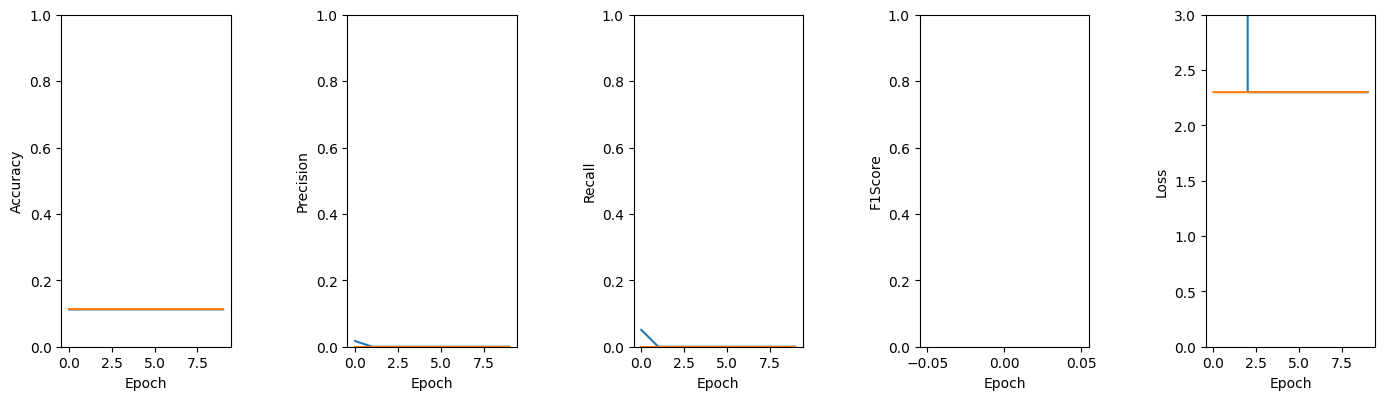






Testing: Adam

Reached 90% accuracy in 1 epochs
313/313 - 0s - loss: 0.1718 - accuracy: 0.9657 - precision: 0.8804 - recall: 7.3314 - 324ms/epoch - 1ms/step

Test accuracy: 0.9656999707221985, Test loss: 0.17175829410552979


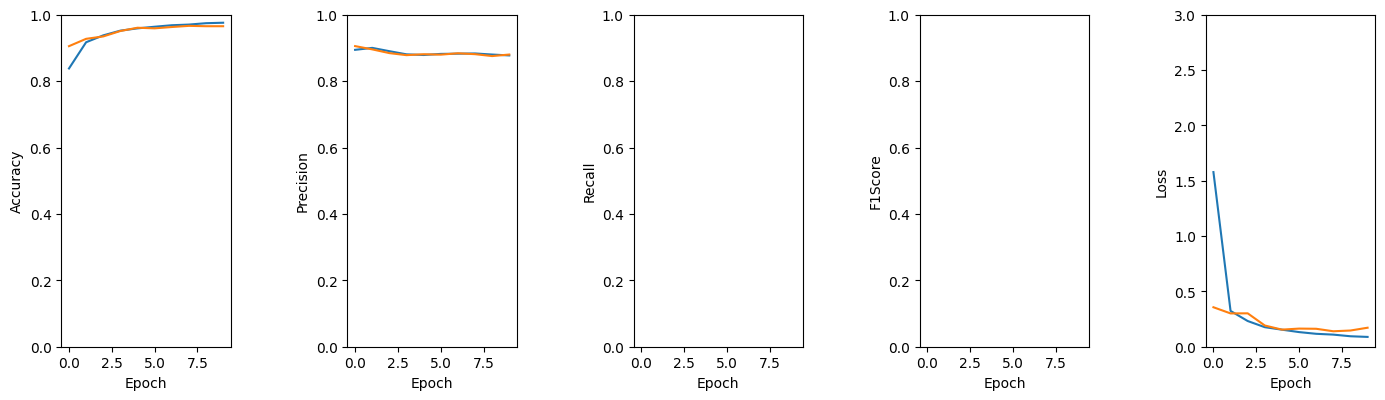






Testing: RMSprop

Reached 90% accuracy in 2 epochs
313/313 - 0s - loss: 0.7012 - accuracy: 0.9088 - precision: 0.5431 - recall: 0.0363 - 363ms/epoch - 1ms/step

Test accuracy: 0.9088000059127808, Test loss: 0.7012308239936829


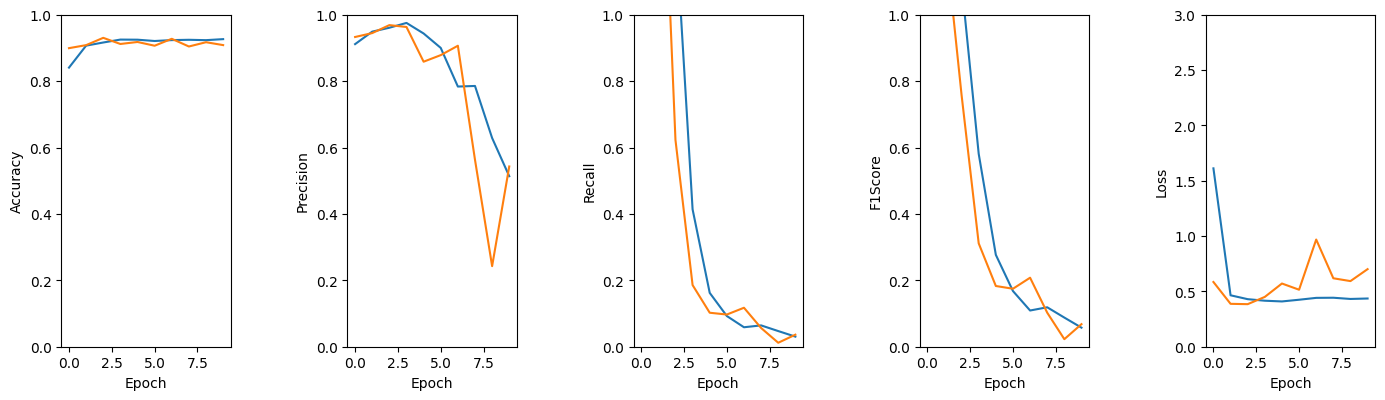






Testing: Adagrad

Never reached 90% accuracy
313/313 - 0s - loss: 1.3903 - accuracy: 0.8923 - precision: 0.8749 - recall: 3.2302 - 311ms/epoch - 994us/step

Test accuracy: 0.892300009727478, Test loss: 1.3902910947799683


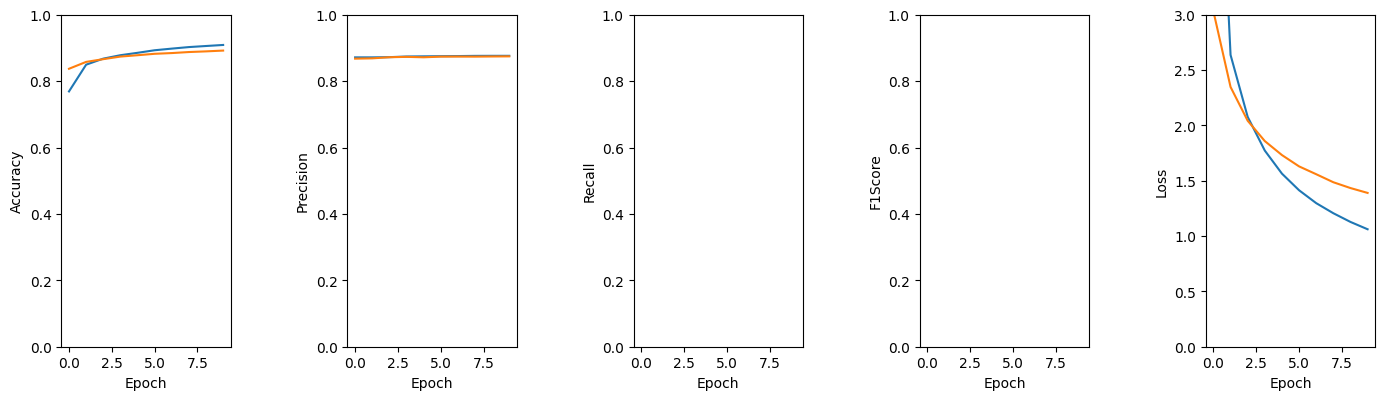

In [40]:
optimizers = ['SGD', 'Adam', 'RMSprop', 'Adagrad']
nn_models = {}
training_results = {}

for optimizer in optimizers:
    model = build_model()
    nn_models[optimizer] = model

    training_results[optimizer] = test_model(model, optimizer)